# **Imports**

In [1]:
import os
os.chdir("../..")
os.chdir(r"src")

from GloVe.weights import *
from Axes.projection_functions import *
from Clustering.clustering_spectral import *

import matplotlib.pyplot as plt

os.chdir("../")

In [2]:
df = pd.read_csv('data/current_dataframes/df', index_col=[0]).reset_index()
df_BT = pd.read_csv('data/current_dataframes/df_BT', index_col=[0]).reset_index()

# **Data selection**

## **Overall**

### Year selection

In [3]:
year = 2015
model_sentences = txt_to_model_sentences('data/sentence_embeddings/sentence_embeddings_'+str(year)+'.txt')
df_t = df[df['year'] == year]

#### Cosine thresholding

In [4]:
df_t = df_t.loc[df_t['cos axe 1'] < -0.4]

#### Tail 

In [5]:
df_sorted = df_t.sort_values(by=['cos axe 2'], ascending=False)
df_t = df_sorted.tail(1000)

## **Choice of company or source**

### Year selection

In [6]:
year = 2015
model_sentences = txt_to_model_sentences('data/sentence_embeddings/sentence_embeddings_'+str(year)+'.txt')
df_t= df_BT.loc[df_BT['year'] == year]

#### Cosine thresholding

In [7]:
df_t = df_t.loc[df_t['cos axe 1'] < -0.4]

#### Tail

In [9]:
df_sorted = df_t.sort_values(by=['cos axe 1'], ascending=False)
df_t = df_sorted.tail(1000)

# **Load the data**

In [10]:
embeds_list = [model_sentences[sentence] for sentence in df_t['text']]
data = np.array(embeds_list)

# **Clusters**

9


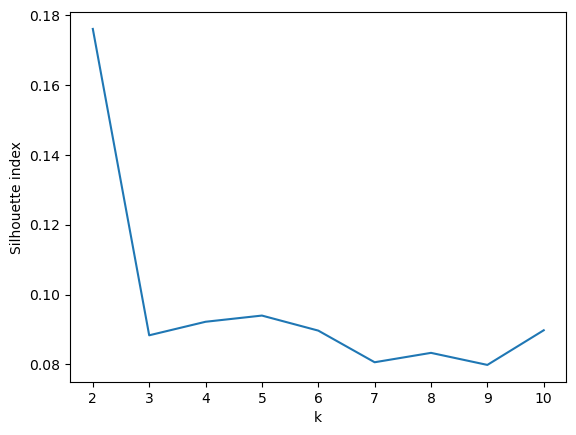

None


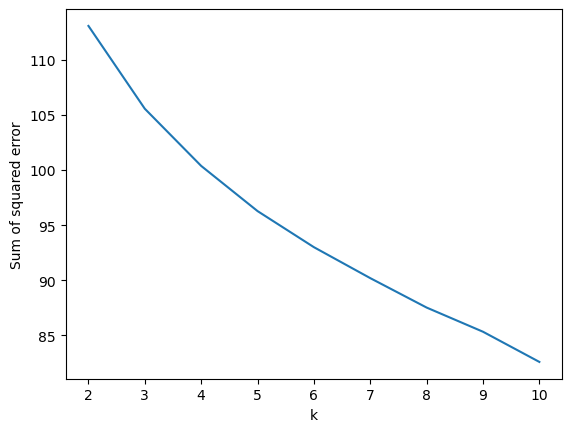

None


In [11]:
plot_silhouette_and_sse(11, data)

In [12]:
plot_clusters_on_pc_kmeans(4, data), plot_clusters_on_pc_spectral(4, data)

(None, None)

In [13]:
visualize_main_words_in_clusters_TFIDF(4, data, df_t)